In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
# Only works in a separate cell
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
def get_data(csv_type='confirmed'):
    # Pull data from Johns Hopkins https://github.com/CSSEGISandData/COVID-19
    base_url= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
    url = base_url+csv_type+"_global.csv"
    df = pd.read_csv(url)
    del df['Lat']
    del df['Long']
    return df

In [4]:
confirmed = get_data()
deaths = get_data(csv_type='deaths')

In [5]:
import scipy.optimize

def logistic(t, L, t0, k):
    return L/(1+np.exp(-k*(t-t0)))

def fit_logistic(t, n):
    sigma = np.sqrt(n)
    popt, pcov = scipy.optimize.curve_fit(logistic, xdata=t, ydata=n, sigma=sigma, 
                                          p0=[10000., 25., 0.5],absolute_sigma=True)
    return (popt, pcov)

def print_fit(popt, pcov):
#    print(popt)
    print(np.sqrt(pcov[0,0]))
    print(np.sqrt(pcov[1,1]))
    print(np.sqrt(pcov[2,2]))
    
#    print(" Max: {:7d}+/-{:7d}".format(int(popt[0]),int(np.sqrt(pcov[0,0])))+
#          " Delay: {:2d}+/-{:2d}".format(int(popt[1]),int(np.sqrt(pcov[1,1])))+
#          " Slope: {:5.2f}+/-{:5.2f}".format(popt[2]),np.sqrt(pcov[2,2]))

In [6]:
def plot_df(df, start=10, 
            countries=['Italy','Spain','Germany','France',
                        'US','United Kingdom','Canada','Korea, South','China']):

    lastdate = df.columns[-1]

    for country in countries:
        df=df.append(df[df['Country/Region']==country][:].sum(axis=0), ignore_index=True)
        last = df.tail(1).index[0]
        df.loc[last,'Province/State']=''
        df.loc[last,'Country/Region']=country
        if str(start) == start:
            pass
        else:
            n=0
            ndates = len(df.columns[2:])
            for date in df.columns[2:]:
                #print(country, date, df.loc[last, date] )
                if df.loc[last, date] > start:
                    startidx = n
                    break
                n+=1
            x = np.arange(ndates-n)
            base_line, = plt.semilogy(x, df.iloc[last][n+2:], alpha=0.5)
            plt.plot([ndates-n-1],[df.iloc[last][-1]],'o', color=base_line.get_color())
            try:
                (popt, pcov) = fit_logistic(x.astype(float), df.iloc[last][n+2:].values.astype(float))
                x = np.arange(50)
                print("{:15s}".format(country),end="")
                print_fit(popt, pcov)
                plt.plot(x, logistic(x, popt[0], popt[1], popt[2]),':', color=base_line.get_color())
            except:
                pass

            plt.annotate(country, ((ndates-n-1+0.2),(df.iloc[last][-1])*1.10), 
                         xycoords='data', color=base_line.get_color(),
                         clip_on=True)
    
#    left, right = plt.xlim()
#    for rate in [1.33,1.25,1.20,1.15,1.10,1.05]:
#        plt.semilogy([left, right],[start,start*(rate**(right-left))],
#                     label=str('{:2d}'.format(int(round((rate-1)*100.,0))))+'% per day',ls=":",c='k',alpha=0.2)
    plt.legend(loc='upper left')

Italy          297.9553113286665
0.031090681509981954
0.00038163308159306654
Spain          472.70311575176726
0.034054573217151794
0.0005695721399767977
Germany        391.34042509102557
0.04005900606029674
0.00064754185518068
France         591.7464467097237
0.07218994913546373
0.0006618557740256501
US             1138.2832187053887
0.027275185353069883
0.0005579298517906687
United Kingdom 1123.4190805568207
0.15004576395800912
0.0011658022309207856
Canada         386.212190637182
0.19160936845703377
0.002664139597537532
Korea, South   20.695108383415427
0.03915967867677523
0.002245517175386242


No handles with labels found to put in legend.


China          44.61229652761869
0.013917678101118127
0.0004281022531913194


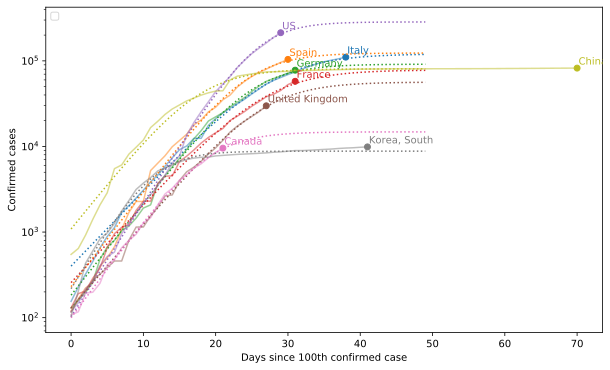

In [7]:
plot_df(confirmed, start=100)
plt.xlabel('Days since 100th confirmed case')
plt.ylabel('Confirmed cases');

No handles with labels found to put in legend.


Italy          119.16587143067372
0.08876722655004295
0.0013077238164076817
Spain          167.3502832208408
0.10898183461851885
0.0025918775122773944
Germany        319.77168902686117
0.9452076627661234
0.010726330713615007
France         192.81537618903116
0.24245368001730183
0.003995421707481161
US             3845.841504824437
0.877274522684902
0.0038403802802447306
United Kingdom 1533.1313852515061
1.0779367820696075
0.006044916488146901
Canada         1796.4959644503797
18.615931447844083
0.046112193705403724
Korea, South   18.941312783638445
1.9817327122073962
0.008661155828319297
China          10.259772636762529
0.08835757178220255
0.0014436452271131826


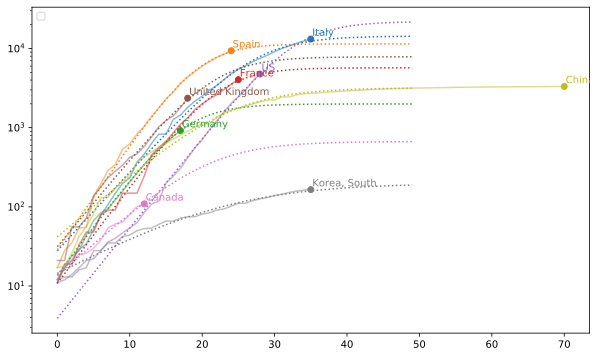

In [8]:
plot_df(deaths, start=10)